In [1]:
from sklearn.linear_model import LinearRegression
from typing import Any, Union
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
from IPython.display import display
import pyMechkar as mechkar
from scipy import stats
from random import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#desired_width=520
#pd.set_option('display.width', desired_width)
#np.set_printoptions(linewidth=desired_width)
#pd.set_option('display.max_columns',18)

In [3]:
## Step one has been done on SQL

## Step 2 - Flat file upload 

In [4]:
Data = pd.read_csv("3products.csv", header=0)
#pd.options.display.max_columns = 13
#display(Data)
#print(Data.head())

In [5]:
Data.describe()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
count,8273.000000,8273.000000,8.273000e+03,8.273000e+03,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,...,8273.000000,8273.000000,8273.000000,8273.0,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000
mean,0.007823,22.648495,7.290002e+12,4.160040e+08,12.488336,6.842739,6.837205,6.151577,12.627869,15.263525,...,0.000242,0.254563,99842.453282,12757437.0,0.380757,29.456382,20.040673,0.085700,1.314511,12.669407
std,0.003761,6.914421,1.230885e+06,2.669047e+04,14.654694,5.016903,5.019008,22.788421,9.589102,10.152253,...,0.015547,0.435642,47985.983455,0.0,0.485602,3.426201,4.209487,0.279938,0.403279,14.405577
min,0.000000,11.000000,7.290000e+12,4.160000e+08,0.000000,2.750000,2.380000,-216.000000,0.350000,1.000000,...,0.000000,0.000000,401.000000,12757437.0,0.000000,21.570000,11.290000,0.000000,0.860000,0.000000
25%,0.005000,17.000000,7.290000e+12,4.160001e+08,2.000000,2.970000,2.970000,-3.000000,5.960000,7.810000,...,0.000000,0.000000,63645.000000,12757437.0,0.000000,26.860000,17.570000,0.000000,1.100000,3.000000
50%,0.007500,23.000000,7.290003e+12,4.160001e+08,10.000000,3.570000,3.570000,1.000000,10.170000,13.810000,...,0.000000,0.000000,95217.000000,12757437.0,0.000000,31.430000,21.290000,0.000000,1.210000,12.000000
75%,0.009800,29.000000,7.290003e+12,4.160002e+08,16.000000,13.820000,13.820000,12.000000,16.170000,19.570000,...,0.000000,1.000000,124461.000000,12757437.0,1.000000,32.000000,24.140000,0.000000,1.440000,16.000000
max,0.020600,34.000000,7.290003e+12,4.162001e+08,312.000000,13.820000,13.820000,240.000000,59.430000,59.430000,...,1.000000,1.000000,263223.000000,12757437.0,1.000000,34.000000,25.140000,1.000000,5.750000,216.000000


In [6]:
Data.dtypes

Customer_ID                          float64
Weeknum                                int64
Product                                int64
Customer_Number                        int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Avg_Quantity_for_PO                  float64
All_week                               int64
Count_week_PO                          int64
Standard_Price                       float64
Above_Standard_Price                   int64
Below_Standard_Price                   int64
Total_Quantity_for_Customer            int64
Total_Quantity                         int64
Holiday                                int64
Temp_Hi                              float64
Temp_Lo                              float64
Temp_Rain                              int64
Frequency_PO                         float64
Sum_Quanti

In [7]:
Data.dtypes[Data.dtypes=='float64']

Customer_ID              float64
Avg_Price_Change         float64
Avg_Price_Change_1       float64
Avg_Quantity_for_Week    float64
Avg_Quantity_for_PO      float64
Standard_Price           float64
Temp_Hi                  float64
Temp_Lo                  float64
Frequency_PO             float64
dtype: object

In [8]:
## determine the number of missing values
Data.isna().sum()

Customer_ID                          0
Weeknum                              0
Product                              0
Customer_Number                      0
Sum_Quantity                         0
Avg_Price_Change                     0
Avg_Price_Change_1                   0
Sum_Quantity_1_minus_Sum_Quantity    0
Avg_Quantity_for_Week                0
Avg_Quantity_for_PO                  0
All_week                             0
Count_week_PO                        0
Standard_Price                       0
Above_Standard_Price                 0
Below_Standard_Price                 0
Total_Quantity_for_Customer          0
Total_Quantity                       0
Holiday                              0
Temp_Hi                              0
Temp_Lo                              0
Temp_Rain                            0
Frequency_PO                         0
Sum_Quantity_1_Y                     0
dtype: int64

## Step 3 - EDA

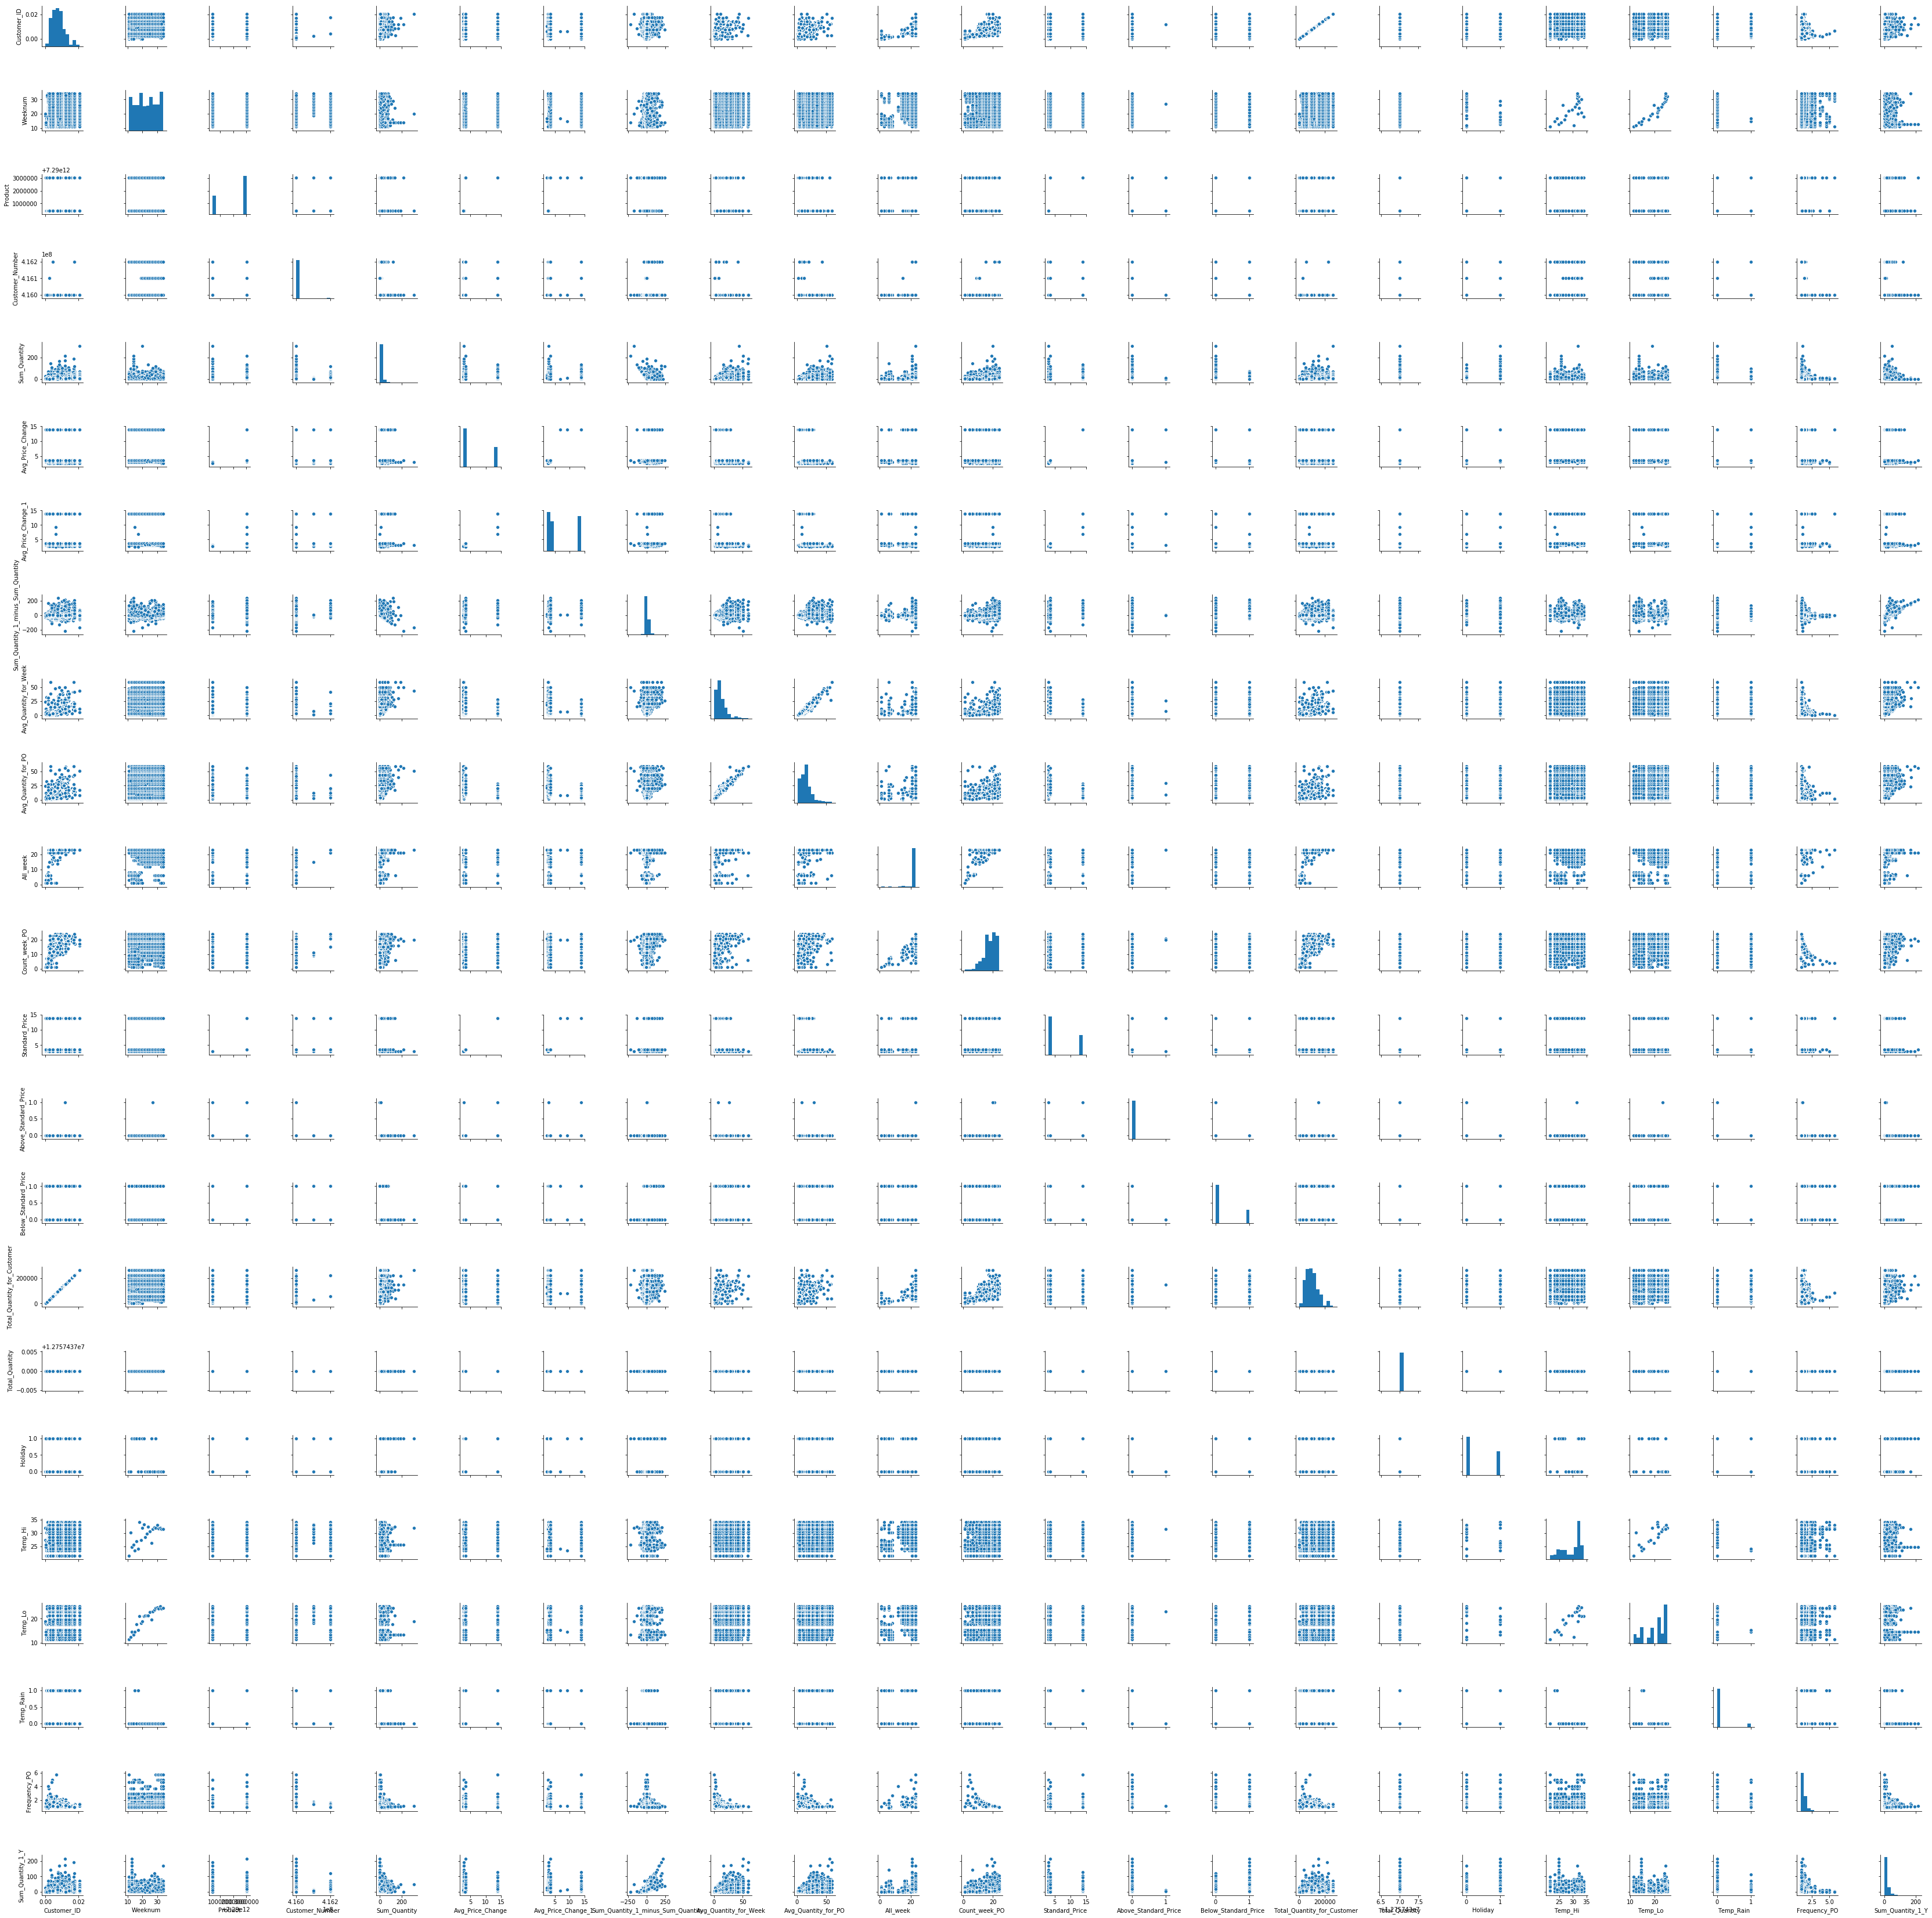

In [9]:
## Ploting bivariate relationtips. This graph will show the scatterplot for each combination and at 
## the diagonal will show the histogram of the variable. This graph helps to detect correlations and 
## outliers
sns.pairplot(Data, height=2)
plt.show()

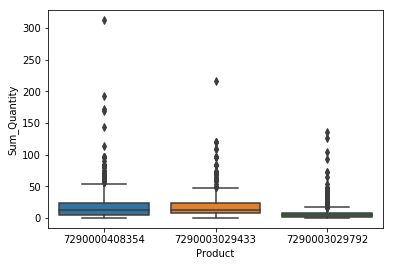

In [10]:
sns.boxplot(x=Data['Product'], y=Data['Sum_Quantity'])
plt.show()

C:\Eyal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


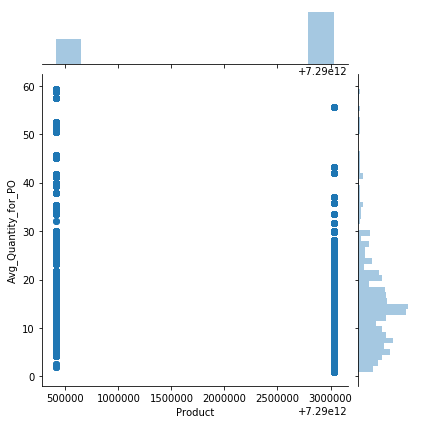

In [11]:
sns.jointplot(x=Data['Product'], y=Data['Avg_Quantity_for_PO'])
plt.show()

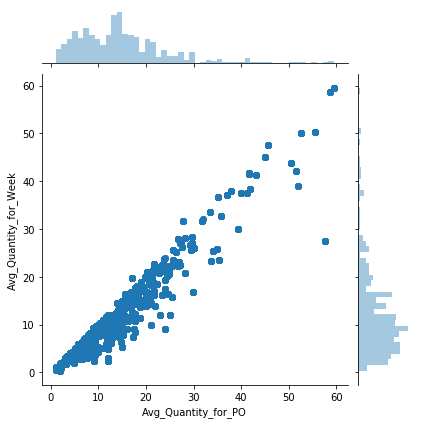

In [12]:
sns.jointplot(x=Data['Avg_Quantity_for_PO'], y=Data['Avg_Quantity_for_Week'])
plt.show()

In [13]:
Data2 = Data.copy()

In [14]:
Data2['Product'] = Data2['Product'].astype('category')


In [15]:
Data2['Customer_Number'] = Data2['Customer_Number'].astype('category')

In [16]:
Data2.dtypes

Customer_ID                           float64
Weeknum                                 int64
Product                              category
Customer_Number                      category
Sum_Quantity                            int64
Avg_Price_Change                      float64
Avg_Price_Change_1                    float64
Sum_Quantity_1_minus_Sum_Quantity       int64
Avg_Quantity_for_Week                 float64
Avg_Quantity_for_PO                   float64
All_week                                int64
Count_week_PO                           int64
Standard_Price                        float64
Above_Standard_Price                    int64
Below_Standard_Price                    int64
Total_Quantity_for_Customer             int64
Total_Quantity                          int64
Holiday                                 int64
Temp_Hi                               float64
Temp_Lo                               float64
Temp_Rain                               int64
Frequency_PO                      

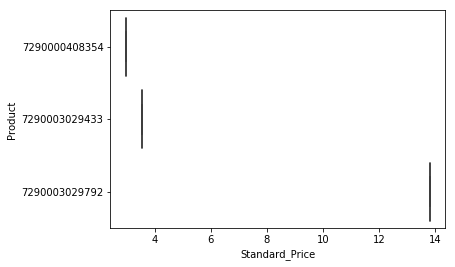

In [17]:
sns.boxplot(x=Data2['Standard_Price'], y=Data2['Product'])
plt.show()

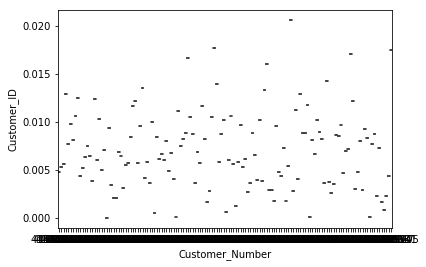

In [18]:
## Customet_ID alse reprosent the share of the customer, Customer number is the name of the customrt 
sns.boxplot(x=Data2['Customer_Number'], y=Data2['Customer_ID'])
plt.show()
# you can see that there are a few "big" customers, however the majority looks a like

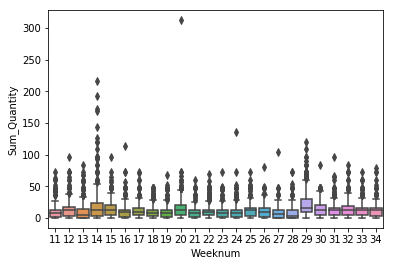

In [19]:
sns.boxplot(x=Data2['Weeknum'], y=Data2['Sum_Quantity'])
plt.show()

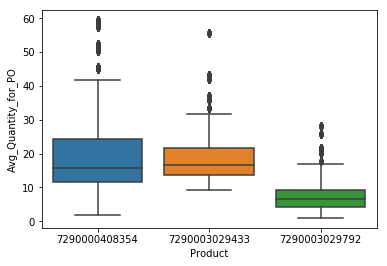

In [20]:
sns.boxplot(x=Data2['Product'], y=Data2['Avg_Quantity_for_PO'])
plt.show()

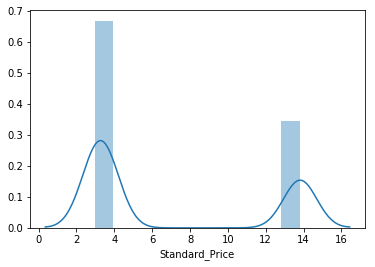

In [21]:
sns.distplot(Data['Standard_Price'])
plt.show()

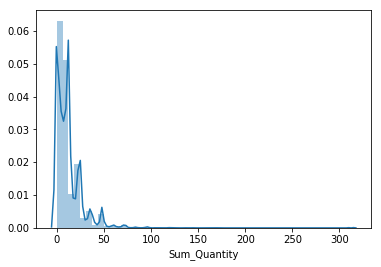

In [22]:
sns.distplot(Data['Sum_Quantity'])
plt.show()

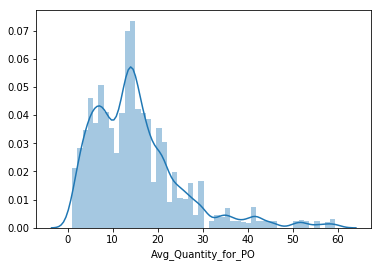

In [23]:
sns.distplot(Data['Avg_Quantity_for_PO'])
plt.show()

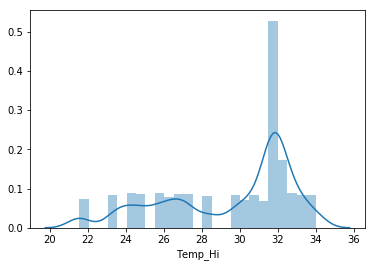

In [24]:
sns.distplot(Data['Temp_Hi'])
plt.show()

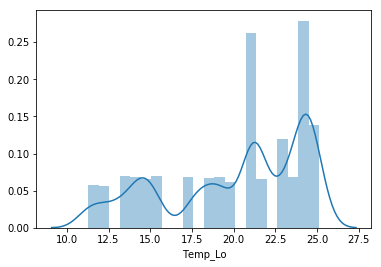

In [25]:
sns.distplot(Data['Temp_Lo'])
plt.show()

In [26]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 

##Data3 = Data2.drop(columns=['Avg_Price_Change','Sum_Quantity_1_minus_Sum_Quantity','Avg_Quantity_for_Week' , 'All_week', 'Count_week_PO', 'Above_Standard_Price', 'Below_Standard_Price', 'Total_Quantity','Avg_Price_Change_1','Temp_Hi','Temp_Lo','Temp_Rain','Frequency_PO','Holiday' ])
##Data3.head

In [27]:
tab1=mechkar.pyMechkar().Table1(data=Data2, y='Customer_number' )
tab1

Factorizing... please wait
***********************
[]
------ Finished in 2.6247177124023438econds -----


,Del,Variables,Categories,n,Population
0,0,Individuals,n,1,8273
1,0,Customer_ID,Mean (SD),1,0.00 ( 0.00)
2,0,Customer_ID,Median (IQR),2,0.00 ( 0.00- 0.00)
3,1,Customer_ID,Missing (%),3,--
4,0,Weeknum,Mean (SD),1,22.60 ( 6.90)
5,0,Weeknum,Median (IQR),2,23.00 ( 17.00- 29.00)
6,1,Weeknum,Missing (%),3,--
7,0,Product,7290003029792,0,"2,715.00 ( 32.80%)"
8,0,Product,7290003029433,1,"2,743.00 ( 33.20%)"
9,0,Product,7290000408354,2,"2,815.00 ( 34.00%)"


In [28]:
## Creat an HTML page of the Mechkar lib
mechkar.pyMechkar().exploreData(data=Data2)


In [29]:
print (Data2.groupby('Product').agg({'Sum_Quantity':['count',sum,'mean']}))

              Sum_Quantity                  
                     count    sum       mean
Product                                     
7290000408354         2715  43162  15.897606
7290003029433         2743  41181  15.013124
7290003029792         2815  18973   6.739964


In [30]:
## print (Data2)

In [31]:
## stop at "defining the error" @ Tree based models - Hyperparamaters

In [32]:
Data2ByProduct = Data2.sort_values(by=['Product', 'Weeknum'])
print(Data2ByProduct.head())

     Customer_ID  Weeknum        Product Customer_Number  Sum_Quantity  \
0         0.0048       11  7290000408354       416000001             0   
36        0.0056       11  7290000408354       416000005             4   
58        0.0129       11  7290000408354       416000006            12   
81        0.0077       11  7290000408354       416000007            12   
105       0.0098       11  7290000408354       416000008            12   

    Avg_Price_Change  Avg_Price_Change_1  Sum_Quantity_1_minus_Sum_Quantity  \
0               2.97                2.97                                 12   
36              2.97                2.97                                  0   
58              2.97                2.97                                  7   
81              2.97                2.97                                  0   
105             2.97                2.97                                -12   

     Avg_Quantity_for_Week  Avg_Quantity_for_PO        ...         \
0          

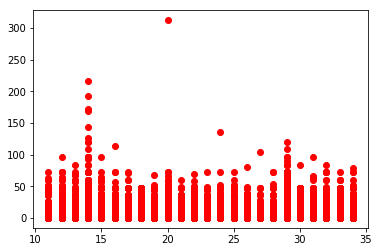

In [33]:
plt.plot (Data.Weeknum, Data.Sum_Quantity, 'ro')

In [34]:
# we can see that in week 14 the quantities are very high, and on week 15 are very low, 

####  Step 4 -  Outliers + Z score

In [35]:
from scipy import stats

Z Score [0.85222459 0.03332482 0.85222459 ... 1.12678318 0.03491683 0.03491683]
Z level higher then 3 and is 20.439169386459405
STDV: 14.653808028473659
Average: 12.488335549377494
Max: 312
Median: 10.0


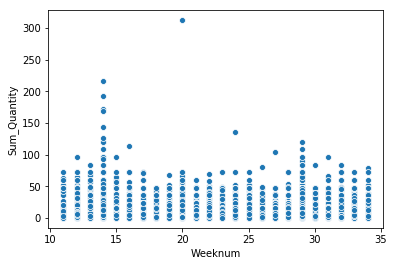

In [36]:
# Z score
z = np.abs(stats.zscore(Data.Sum_Quantity))
print("Z Score", z)

if (np.any(z>3)):
    print("Z level higher then 3 and is" , np.max(z))
else:
    print ("Z OK")


# statistic
stdv = np.std(Data.Sum_Quantity)
print("STDV:",stdv)
aver = np.average(Data.Sum_Quantity)
print("Average:",aver)
max = np.amax(Data.Sum_Quantity)
print("Max:",max)
med = np.median(Data.Sum_Quantity)
print("Median:",med)

sns.scatterplot(x=Data.Weeknum,y=Data.Sum_Quantity)


Z Score [0.88827688 0.02905627 0.88827688 ... 1.18817292 0.04254545 0.04254545]
Z level higher then 3 and is 11.427218507525685
STDV: 13.966145460826604
Average: 12.405804111245466
Max: 172
Median: 10.0


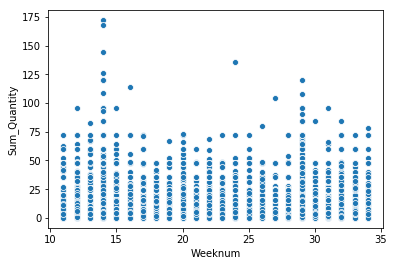

In [37]:

## Eliminating  points
threshold = 190
Data = Data[(Data.Sum_Quantity < threshold)]

# Z value
z = np.abs(stats.zscore(Data.Sum_Quantity))
print("Z Score", z)

if (np.any(z>3)):
    print("Z level higher then 3 and is" , np.max(z))
else:
    print ("Z OK")


# statistic
stdv = np.std(Data.Sum_Quantity)
print("STDV:",stdv)
aver = np.average(Data.Sum_Quantity)
print("Average:",aver)
max = np.amax(Data.Sum_Quantity)
print("Max:",max)
med = np.median(Data.Sum_Quantity)
print("Median:",med)


sns.scatterplot(x=Data.Weeknum,y=Data.Sum_Quantity)

Z Score [0.22231976 0.22231976 0.22231976 ... 0.48997979 0.48997979 0.48997979]
Z level higher then 3 and is 4.3636426659133996
STDV: 10.12478402175948
Average: 15.24906045949214
Max: 59.43
Median: 13.81


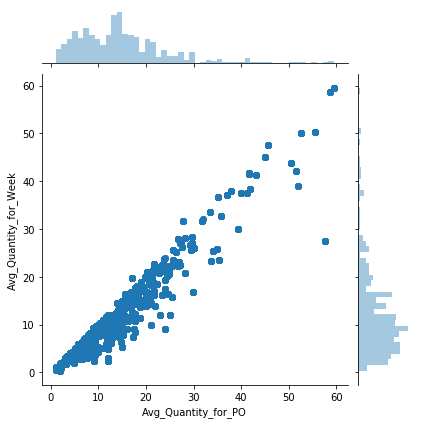

In [38]:
# Original plot

# Z score
z = np.abs(stats.zscore(Data.Avg_Quantity_for_PO))
print("Z Score", z)
if (np.any(z>3)):
    print("Z level higher then 3 and is" , np.max(z))
else:
    print ("Z OK")

# statistic
stdv = np.std(Data.Avg_Quantity_for_PO)
print("STDV:",stdv)
aver = np.average(Data.Avg_Quantity_for_PO)
print("Average:",aver)
max = np.amax(Data.Avg_Quantity_for_PO)
print("Max:",max)
med = np.median(Data.Avg_Quantity_for_PO)
print("Median:",med)

sns.jointplot(x=Data['Avg_Quantity_for_PO'], y=Data['Avg_Quantity_for_Week'])
plt.show()



Z Score [0.27690851 0.27690851 0.27690851 ... 0.56526978 0.56526978 0.56526978]
Z level higher then 3 and is 4.006451884579036
STDV: 9.397933333510421
Average: 14.897632284808584
Max: 52.55
Median: 13.67


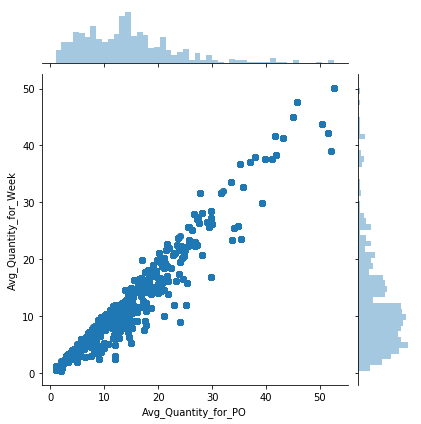

In [39]:
# updated plot 

## Eliminating points
threshold = 55
Data = Data[(Data.Avg_Quantity_for_PO < threshold)]

sns.jointplot(x=Data.Avg_Quantity_for_PO,y=Data.Avg_Quantity_for_Week)

# Z score
z = np.abs(stats.zscore(Data.Avg_Quantity_for_PO))
print("Z Score", z)
if (np.any(z>3)):
    print("Z level higher then 3 and is" , np.max(z))
else:
    print ("Z OK")

# statistic
stdv = np.std(Data.Avg_Quantity_for_PO)
print("STDV:",stdv)
aver = np.average(Data.Avg_Quantity_for_PO)
print("Average:",aver)
max = np.amax(Data.Avg_Quantity_for_PO)
print("Max:",max)
med = np.median(Data.Avg_Quantity_for_PO)
print("Median:",med)



## Single product tests - for internal use

In [40]:
# extract a single product (7290003029792) and plot its quantities per week
P792 = Data2ByProduct.Product == 7290003029792
Prod792 = Data2ByProduct.copy()[P792]
Prod792.head()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
5458,0.0048,11,7290003029792,416000001,5,13.82,13.82,-2,3.70,3.86,...,0,0,60916,12757437,0,21.57,11.29,0,1.05,3
5481,0.0053,11,7290003029792,416000002,8,13.82,13.82,-4,6.96,8.00,...,0,0,67778,12757437,0,21.57,11.29,0,1.15,4
5505,0.0056,11,7290003029792,416000005,7,13.82,13.82,1,4.74,5.19,...,0,0,71258,12757437,0,21.57,11.29,0,1.10,4
5529,0.0129,11,7290003029792,416000006,3,13.82,13.82,1,6.43,6.73,...,0,0,164021,12757437,0,21.57,11.29,0,1.05,4
5553,0.0077,11,7290003029792,416000007,2,13.82,13.82,2,3.65,4.20,...,0,0,98187,12757437,0,21.57,11.29,0,1.15,4


Text(0.5, 1.0, '7290003029792 with Holiday')

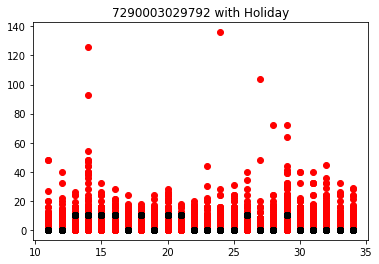

In [41]:
plt.plot (Prod792.Weeknum, Prod792.Sum_Quantity, 'ro')
plt.plot (Data.Weeknum, (Data.Holiday)*10, 'ro', color='black')
plt.title ('7290003029792 with Holiday')

In [42]:
z = np.abs(stats.zscore(Prod792.Sum_Quantity))
print(z)


[0.21154186 0.15319293 0.03161467 ... 0.8194332  0.4546984  0.76108427]


In [43]:
Prod792.describe()

,Customer_ID,Weeknum,Sum_Quantity,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,All_week,Count_week_PO,Total_Quantity_for_Customer,Temp_Hi,Temp_Lo,Frequency_PO,Sum_Quantity_1_Y
count,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000
mean,0.007803,22.706572,6.739964,13.815908,4.316874,6.928451,7.665297,22.093783,19.126465,99582.720071,29.474330,20.078114,1.204860,6.778686
std,0.003750,6.895855,8.226616,0.156536,14.547857,5.174193,5.056106,2.760857,4.006790,47847.774854,3.420708,4.196048,0.345288,7.790503
min,0.000000,11.000000,0.000000,6.910000,-128.000000,0.350000,1.000000,1.000000,1.000000,401.000000,21.570000,11.290000,0.860000,0.000000
25%,0.005000,17.000000,2.000000,13.820000,-1.000000,3.610000,4.225000,23.000000,18.000000,63645.000000,26.860000,17.570000,1.050000,2.000000
50%,0.007500,23.000000,5.000000,13.820000,1.000000,5.570000,6.450000,23.000000,20.000000,95217.000000,31.430000,21.290000,1.150000,5.000000
75%,0.009800,29.000000,8.000000,13.820000,6.000000,8.570000,9.380000,23.000000,22.000000,124461.000000,32.000000,24.140000,1.280000,8.000000
max,0.020600,34.000000,136.000000,13.820000,206.000000,28.140000,28.140000,23.000000,24.000000,263223.000000,34.000000,25.140000,5.750000,126.000000


It can be seen that the quantities are subjected to the Holidays (@ week 15)

## step 6 - Variable Selection (Find Correlation and P-Values) 

In [44]:
## Pearson

In [45]:

##df = pd.DataFrame(Data, columns = ['Sum_Quantity','Sum_Quantity_1_Y'])
from scipy import stats 

##pearson_coef, p_value = stats.pearsonr(df["Sum_Quantity"], df["Sum_Quantity_1_Y"]) #define the columns to perform calculations on
##print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

In [46]:
## P-value

In [47]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [48]:
## Calculate the P Value of the different paramaters (The p-value roughly indicates the probability of an uncorrelated system therefore we are looking for thos)
calculate_pvalues(Data)

C:\Eyal\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Eyal\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
Customer_ID,0,0.4767,0.6969,0,0,0.6984,0.6978,0,0,0,...,0.1371,0,0,1,0.8976,0.3934,0.2574,0.8081,0,0
Weeknum,0.4767,0,0.7542,0.6226,0.7104,0.7448,0.7567,0.2258,0.5028,0.8134,...,0.3741,0,0.479,1,0,0,0,0,0.0043,0.9853
Product,0.6969,0.7542,0,0.881,0,0,0,0.0001,0,0,...,0.5974,0.0397,0.7022,1,0.727,0.7838,0.7093,0.9231,0,0
Customer_Number,0,0.6226,0.881,0,0.0279,0.9171,0.9195,0,0.0001,0.0304,...,0.8329,0.3179,0,1,0.6578,0.5667,0.4841,0.5863,0.0019,0.0289
Sum_Quantity,0,0.7104,0,0.0279,0,0,0,0.0027,0,0,...,0.3932,0,0,1,0,0.3915,0.1716,0.1081,0,0
Avg_Price_Change,0.6984,0.7448,0,0.9171,0,0,0,0,0,0,...,0.6689,0,0.7028,1,0.8534,0.8101,0.6943,0.9729,0,0
Avg_Price_Change_1,0.6978,0.7567,0,0.9195,0,0,0,0,0,0,...,0.6679,0,0.7022,1,0.7244,0.8258,0.7273,0.9029,0,0
Sum_Quantity_1_minus_Sum_Quantity,0,0.2258,0.0001,0,0.0027,0,0,0,0,0,...,0.9968,0,0,1,0.0834,0.4662,0.3018,0.0002,0,0
Avg_Quantity_for_Week,0,0.5028,0,0.0001,0,0,0,0,0,0,...,0.4674,0,0,1,0.6666,0.5715,0.6353,0.5141,0,0
Avg_Quantity_for_PO,0,0.8134,0,0.0304,0,0,0,0,0,0,...,0.5626,0.8731,0,1,0.625,0.8271,0.9724,0.5047,0,0


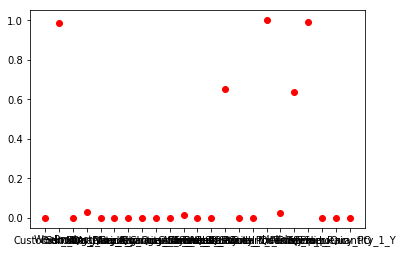

In [49]:
show_p = calculate_pvalues(Data)
plt.plot(show_p['Sum_Quantity_1_Y'], 'ro')
plt.show()

In [50]:
## Pearsin Corr

In [51]:
## present the corelletion (+1 or -1 implying corelation where exeact -1 or 1 implaying linear corr; 0 implying NO corr)
df = pd.DataFrame(data=Data)
df.corr()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
Customer_ID,1.000000,0.007858,0.004302,0.084828,0.252987,0.004279,0.004288,0.152079,0.413472,0.366659,...,0.016415,-0.104062,0.999971,NaN,-0.001421,0.009425,0.012506,-0.002682,-0.332587,0.254455
Weeknum,0.007858,1.000000,0.003458,0.005435,0.004100,0.003594,0.003422,-0.013375,-0.007399,-0.002606,...,0.009816,0.060162,0.007817,NaN,-0.405137,0.667188,0.935439,-0.292988,0.031501,-0.000204
Product,0.004302,0.003458,1.000000,-0.001653,-0.158119,0.540745,0.541089,-0.042978,-0.242097,-0.300132,...,-0.005832,-0.022716,0.004222,NaN,-0.003856,0.003030,0.004117,-0.001066,-0.123578,-0.165313
Customer_Number,0.084828,0.005435,-0.001653,1.000000,0.024278,-0.001149,-0.001117,0.059250,0.042375,0.023902,...,-0.002330,-0.011030,0.084396,NaN,-0.004891,0.006328,0.007728,-0.006011,-0.034266,0.024118
Sum_Quantity,0.252987,0.004100,-0.158119,0.024278,1.000000,-0.290679,-0.289512,0.033120,0.617213,0.604308,...,-0.009430,-0.358617,0.253098,NaN,0.088543,-0.009463,-0.015097,0.017742,-0.191709,0.246146
Avg_Price_Change,0.004279,0.003594,0.540745,-0.001149,-0.290679,1.000000,0.999712,-0.056884,-0.435676,-0.556963,...,0.004723,-0.172316,0.004213,NaN,0.002041,0.002654,0.004340,-0.000375,-0.197385,-0.295843
Avg_Price_Change_1,0.004288,0.003422,0.541089,-0.001117,-0.289512,0.999712,1.000000,-0.058738,-0.435707,-0.556948,...,0.004739,-0.171309,0.004222,NaN,0.003894,0.002431,0.003851,-0.001347,-0.197283,-0.297640
Sum_Quantity_1_minus_Sum_Quantity,0.152079,-0.013375,-0.042978,0.059250,0.033120,-0.056884,-0.058738,1.000000,0.348748,0.304686,...,-0.000045,0.169039,0.152235,NaN,-0.019118,-0.008047,-0.011403,-0.041147,-0.141101,0.772773
Avg_Quantity_for_Week,0.413472,-0.007399,-0.242097,0.042375,0.617213,-0.435676,-0.435707,0.348748,1.000000,0.961460,...,0.008026,-0.066029,0.413670,NaN,0.004758,-0.006248,-0.005238,0.007206,-0.356083,0.619333
Avg_Quantity_for_PO,0.366659,-0.002606,-0.300132,0.023902,0.604308,-0.556963,-0.556948,0.304686,0.961460,1.000000,...,0.006394,0.001764,0.366869,NaN,0.005398,-0.002411,-0.000382,0.007368,-0.175761,0.608974


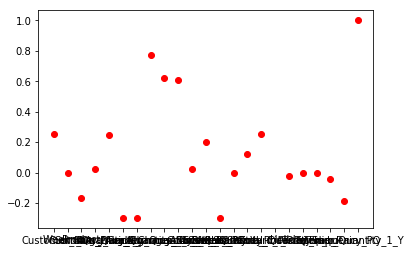

In [52]:
show_corr = df.corr()
plt.plot(show_corr['Sum_Quantity_1_Y'], 'ro')
plt.show()

In [53]:
## Spearman Corr

In [54]:
from scipy.stats import pearsonr
import pandas as pd
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")

def calculate_spvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    spvalues = dfcols.transpose().join(dfcols, how='outer')
    pval = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
             spvalues[r][c] = round(spearmanr(df[r], df[c])[0], 4)
    return spvalues

In [55]:
calculate_spvalues(Data)

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
Customer_ID,1,0.0061,0.0023,0.0169,0.2669,-0.0006,-0.0029,0.1421,0.4403,0.3544,...,0.0192,-0.1121,0.9999,NaN,-0.0002,0.0076,0.0072,-0.0024,-0.3912,0.2724
Weeknum,0.0061,1,0.0052,0.0257,0.0322,-0.0175,-0.0272,0.0038,-0.0106,-0.0044,...,0.0096,0.0604,0.0062,NaN,-0.4071,0.5793,0.9559,-0.2934,0.0325,0.0324
Product,0.0023,0.0052,1,-0.0076,-0.257,0.9905,0.9869,-0.0331,-0.4371,-0.5373,...,-0.0003,-0.1131,0.0023,NaN,-0.0017,0.0024,0.0051,-0.0015,-0.235,-0.2683
Customer_Number,0.0169,0.0257,-0.0076,1,0.0535,-0.0073,-0.0078,0.0605,0.1081,0.0733,...,-0.0138,-0.0174,0.0162,NaN,-0.0094,0.0126,0.024,-0.0076,-0.0925,0.0587
Sum_Quantity,0.2669,0.0322,-0.257,0.0535,1,-0.2681,-0.2487,-0.2784,0.577,0.5478,...,-0.0125,-0.5471,0.2671,NaN,0.0505,0.0046,0.0351,0.0378,-0.2677,0.1396
Avg_Price_Change,-0.0006,-0.0175,0.9905,-0.0073,-0.2681,1,0.9878,-0.017,-0.436,-0.534,...,-0,-0.1667,-0.0005,NaN,0.0139,0.0002,-0.011,0.0094,-0.2288,-0.2562
Avg_Price_Change_1,-0.0029,-0.0272,0.9869,-0.0078,-0.2487,0.9878,1,-0.0478,-0.4367,-0.5343,...,0.0002,-0.1563,-0.0028,NaN,0.034,-0.0081,-0.026,0.0102,-0.2264,-0.2858
Sum_Quantity_1_minus_Sum_Quantity,0.1421,0.0038,-0.0331,0.0605,-0.2784,-0.017,-0.0478,1,0.2236,0.1962,...,0.0037,0.3305,0.1425,NaN,-0.0503,0.0226,0.0176,-0.0467,-0.1914,0.7796
Avg_Quantity_for_Week,0.4403,-0.0106,-0.4371,0.1081,0.577,-0.436,-0.4367,0.2236,1,0.949,...,0.0068,-0.0496,0.4408,NaN,0.0058,-0.0091,-0.0098,0.0084,-0.4186,0.5845
Avg_Quantity_for_PO,0.3544,-0.0044,-0.5373,0.0733,0.5478,-0.534,-0.5343,0.1962,0.949,1,...,0.0051,0.0273,0.3548,NaN,0.0055,-0.0035,-0.0037,0.0072,-0.1676,0.5596


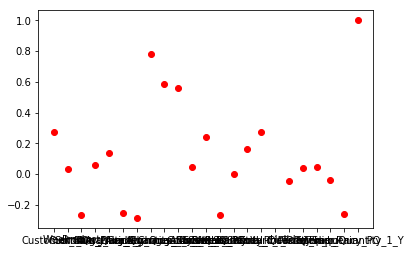

In [56]:
show_corr = calculate_spvalues(Data)
plt.plot(show_corr['Sum_Quantity_1_Y'], 'ro')
plt.show()

## Prediction calculation 

In [57]:
## sort the data by product

Data = Data.sort_values(by=['Product', 'Weeknum'])

# check the dataset balance
print (Data.groupby('Product').agg({'Sum_Quantity':['count',sum,'mean']}))

              Sum_Quantity                  
                     count    sum       mean
Product                                     
7290000408354         2666  40617  15.235184
7290003029433         2721  40125  14.746417
7290003029792         2815  18973   6.739964


## Step-7 Train-Dev-Test preparation

In [96]:
y = Data.values[:, -1]
x = Data.values[:, 1:-1]

indexes = [x for x in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]
x_train = x[train_indx]
x_test = x[test_indx]
y_train = y[train_indx]
y_test = y[test_indx]

In [59]:
#y = Data.values[:, -1]
#x = Data.values[:, 2:-1]

#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [60]:
# Train number of line (90%)
print("train:", len (x_train))
print ("test: ", len (x_test))



train: 7382
test:  820


## Train&Test Balance 

In [61]:
##  products balance in train 
## 7290000408354
## 7290003029433
## 7290003029792

i = 0
P354 = 0 
P433 = 0
P792 = 0

x_test [0,0]

for i in range(len (x_train)):
    if (x_train [i,1]) == 7290000408354:
        P354 = P354+1
    elif (x_train [i,1]) == 7290003029433:
        P433 = P433+1
    elif (x_train [i,1]) == 7290003029792:
        P792 = P792+1         

print ("the products distribution on Train is: ", P354, P433, P792)  
        

the products distribution on Train is:  2388 2449 2545


In [62]:
##  products balance in test 
## 7290000408354
## 7290003029433
## 7290003029792

i = 0
P354 = 0 
P433 = 0
P792 = 0

x_test [0,0]

for i in range(len (x_test)):
    if (x_test [i,1]) == 7290000408354:
        P354 = P354+1
    elif (x_test [i,1]) == 7290003029433:
        P433 = P433+1
    elif (x_test [i,1]) == 7290003029792:
        P792 = P792+1         

print ("the products distribution on Test is:", P354, P433, P792)  
        


the products distribution on Test is: 278 272 270


## Step 8 Model Selection

In [63]:
## Prediciton of "Data" the full Dataset

In [64]:
## Test Linear regression

In [65]:
mod_linear = LinearRegression(n_jobs=-1)
mod_linear.fit(x_train, y_train)
pred_linear = mod_linear.predict(x_test)
pred_linear = np.round(pred_linear)
#acc_linear=accuracy_score(y_test, pred_linear, normalize=False)
#print("acc linear", acc_linear)
mae_linear = mean_absolute_error(y_test, pred_linear)
print("MAE linear", mae_linear)

pred_train_linear = mod_linear.predict(x_train)
pred_train_linear = np.round(pred_train_linear)
mae_train_linear = mean_absolute_error(y_train, pred_train_linear)
print("MAE train linear", mae_train_linear)

MAE linear 4.360975609756098
MAE train linear 3.9643727986995394


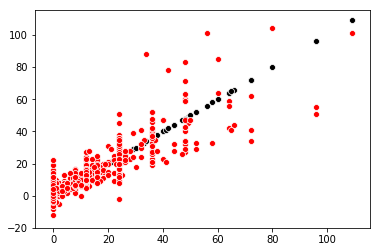

In [66]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_linear, color="red")
plt.show()

In [67]:
## LASSO 

MAE linear 3.870731707317073
MAE train Lasso 4.030073150907613


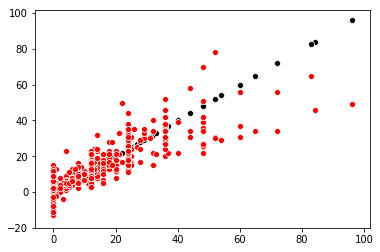

In [97]:
from sklearn import linear_model


mod_Lasso = linear_model.Lasso(alpha=0.1)
mod_Lasso.fit(x_train, y_train)
pred_Lasso = mod_Lasso.predict(x_test)
pred_Lasso = np.round(pred_Lasso)


mae_Lasso = mean_absolute_error(y_test, pred_Lasso)
print("MAE linear", mae_Lasso)

pred_train_Lasso = mod_Lasso.predict(x_train)
pred_train_Lasso = np.round(pred_train_Lasso)
mae_train_Lasso = mean_absolute_error(y_train, pred_train_Lasso)
print("MAE train Lasso", mae_train_Lasso)


sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_Lasso, color="red")
plt.show()

In [69]:
## RIDGE

MAE linearv Redge 4.360975609756098
MAE train Redge 3.9649146572744516


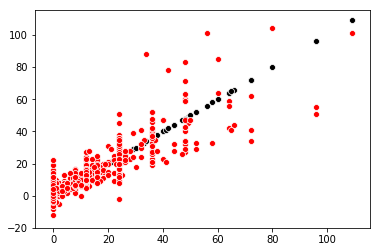

In [70]:
from sklearn.linear_model import Ridge

n_samples, n_features = 10, 5

mod_Ridge = Ridge(alpha=0.1)
mod_Ridge.fit(x_train, y_train)
pred_Ridge = mod_Ridge.predict(x_test)
pred_Ridge = np.round(pred_Ridge)


mae_Ridge = mean_absolute_error(y_test, pred_Ridge)
print("MAE linearv Redge", mae_Ridge)

pred_train_Ridge = mod_Ridge.predict(x_train)
pred_train_Ridge = np.round(pred_train_Ridge)
mae_train_Ridge = mean_absolute_error(y_train, pred_train_Ridge)
print("MAE train Redge", mae_train_Ridge)

sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_Ridge, color="red")
plt.show()

In [71]:
## SVM

In [72]:
mod_svm = svm.SVC (kernel='sigmoid',gamma=3 ,probability=False, random_state=0)
y_pred_svm = mod_svm.fit(x_train,y_train)
pred_svm = mod_svm.predict(x_test)
#acc_svm=accuracy_score(y_test,pred_svm, normalize=False)
#print("acc svm", acc_svm)
mae_svm = mean_absolute_error(y_test, pred_svm)
print("MAE svm",mae_svm)

pred_train_svm = mod_svm.predict(x_train)
mae_train_svm = mean_absolute_error(y_train, pred_train_svm)
print("MAE train svm", mae_train_svm)

MAE svm 9.56829268292683
MAE train svm 8.961257111893795


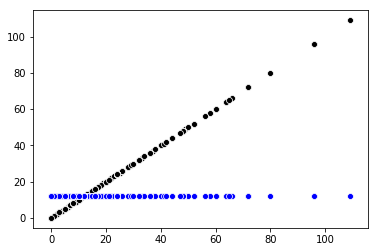

In [73]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_svm, color="blue")
plt.show()

In [74]:
## AdaBoostClassifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y_pred_AdaBoost = mod_rforest.fit(x_train,y_train)
pred_AdaBoost = mod_rforest.predict(x_test) 
#acc_adaBoost = accuracy_score(y_test,pred_AdaBoost, normalize=False)
#print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

pred_train_AdaBoost = mod_rforest.predict(x_train)
mae_train_AdaBoost = mean_absolute_error(y_train, pred_train_AdaBoost)
print("MAE train AdaBoost", mae_train_AdaBoost)

mea AdaBoost 5.380487804878049
MAE train AdaBoost 4.971416960173395


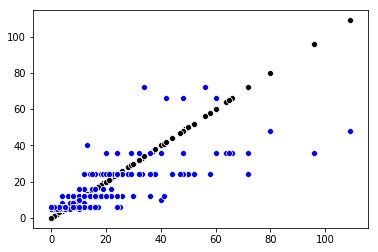

In [76]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_AdaBoost, color="blue")
plt.show()

In [77]:
## GaussianNB

In [78]:
from sklearn.naive_bayes import GaussianNB
mod_bayes = GaussianNB()
y_pred_naive = mod_bayes.fit(x_train,y_train)
pred_naive = mod_bayes.predict(x_test)
#acc_naive=accuracy_score(y_test, pred_naive, normalize=False)
#print("acc naive", acc_naive)
mae_naive = mean_absolute_error(y_test, pred_naive)
print("MAE naive", mae_naive)

pred_train_naive = mod_bayes.predict(x_train)
mae_train_naive = mean_absolute_error(y_train, pred_train_naive)
print("MAE train naive", mae_train_naive)

MAE naive 24.308536585365854
MAE train naive 24.513140070441615


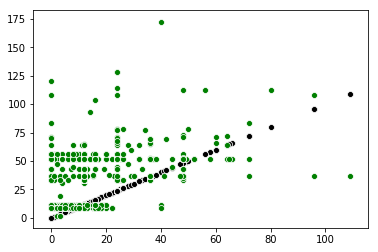

In [79]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_naive, color="green")
plt.show()

In [80]:
## LogisticRegression

In [81]:
from sklearn.linear_model import LogisticRegression
mod_logistic = LogisticRegression()
mod_logistic.fit(x_train,y_train)
pred_logistic = mod_logistic.predict(x_test)
acc_logistic=accuracy_score(y_test, pred_logistic, normalize=False)
#print("acc logistic", acc_logistic)
mae_logistic = mean_absolute_error(y_test, pred_logistic)
print("MAE logistic", mae_logistic)

pred_train_logistic = mod_logistic.predict(x_train)
mae_train_logistic = mean_absolute_error(y_train, pred_train_logistic)
print("MAE train logistic", mae_train_logistic)

MAE logistic 9.56829268292683
MAE train logistic 8.961257111893795


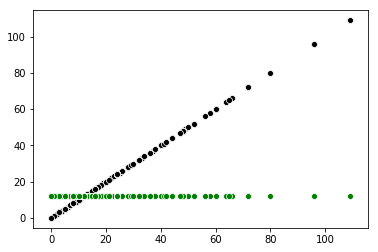

In [82]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_logistic, color="green")
plt.show()

## Step 9 - Model Fine-tuning

## Initiate a new database with High Correlation columns 

In [83]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 
## based on the p-value and Pearson Correlation 
DropData = Data.drop(columns=['Weeknum', 'Customer_Number', 'All_week', 'Above_Standard_Price','Below_Standard_Price','Total_Quantity','Holiday','Temp_Hi','Temp_Lo','Temp_Rain','Frequency_PO'])
print(DropData.dtypes)
#print(DropData.head())

Customer_ID                          float64
Product                                int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Avg_Quantity_for_PO                  float64
Count_week_PO                          int64
Standard_Price                       float64
Total_Quantity_for_Customer            int64
Sum_Quantity_1_Y                       int64
dtype: object


In [84]:
y= DropData.values[:, -1]
x = DropData.values[:, 1:-1]

indexes = [x for x in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]
x2_train = x[train_indx]
x2_test = x[test_indx]
y2_train = y[train_indx]
y2_test = y[test_indx]

In [85]:
#y2 = DropData.values[:, -1]
#x2 = DropData.values[:, 0:-1]

#x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.10, random_state=42)

In [86]:
# Use Ada boost
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y2_pred_AdaBoost = mod_rforest.fit(x2_train,y2_train)
pred_AdaBoost = mod_rforest.predict(x2_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
#acc_adaBoost = accuracy_score(y2_test,pred_AdaBoost, normalize=False)
#print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y2_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

pred_train_AdaBoost = mod_rforest.predict(x2_train)
mae_train_AdaBoost = mean_absolute_error(y2_train, pred_train_AdaBoost)
print("MAE train AdaBoost", mae_train_AdaBoost)

mea AdaBoost 5.632926829268293
MAE train AdaBoost 5.538742888106205


In [87]:
# Use Linear Reg 

mod_linear = LinearRegression(n_jobs=-1)
mod_linear.fit(x2_train, y2_train)
pred_linear = mod_linear.predict(x2_test)
pred_linear = np.round(pred_linear)
#acc_linear=accuracy_score(y2_test, pred_linear, normalize=False)
#print("acc linear", acc_linear)
mae_linear = mean_absolute_error(y2_test, pred_linear)
print("MAE linear", mae_linear)

pred_train_linear = mod_linear.predict(x2_train)
pred_train_linear = np.round(pred_train_linear)
mae_train_linear = mean_absolute_error(y2_train, pred_train_linear)
print("MAE train linear", mae_train_linear)

MAE linear 4.353658536585366
MAE train linear 3.979680303440802


## Drop Data 2, based on manual tests 

In [88]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 
## based on the p-value and Pearson Correlation 
DropData2 = Data.drop(columns=['Standard_Price','Avg_Quantity_for_PO','Total_Quantity_for_Customer','Weeknum','Customer_Number','All_week','Below_Standard_Price','Above_Standard_Price','Holiday','Temp_Hi','Temp_Lo','Temp_Rain','Frequency_PO'])

## Droped: 
DropData2.dtypes

Customer_ID                          float64
Product                                int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Count_week_PO                          int64
Total_Quantity                         int64
Sum_Quantity_1_Y                       int64
dtype: object

In [89]:
y= DropData2.values[:, -1]
x = DropData2.values[:, 1:-1]

indexes = [x for x in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]
x2_train = x[train_indx]
x2_test = x[test_indx]
y2_train = y[train_indx]
y2_test = y[test_indx]

In [90]:
#y2 = DropData.values[:, -1]
#x2 = DropData.values[:, 0:-1]

#x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.10, random_state=42)

In [91]:
## Using Ada boost Classifier
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y2_pred_AdaBoost = mod_rforest.fit(x2_train,y2_train)
pred_AdaBoost = mod_rforest.predict(x2_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
#acc_adaBoost = accuracy_score(y2_test,pred_AdaBoost, normalize=False)
#print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y2_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

pred_train_AdaBoost = mod_rforest.predict(x2_train)
mae_train_AdaBoost = mean_absolute_error(y2_train, pred_train_AdaBoost)
print("MAE train AdaBoost", mae_train_AdaBoost)

mea AdaBoost 7.2109756097560975
MAE train AdaBoost 6.857626659441886


In [92]:
## Use linear reg

mod_linear = LinearRegression(n_jobs=-1)
mod_linear.fit(x2_train, y2_train)
pred_linear = mod_linear.predict(x2_test)
pred_linear = np.round(pred_linear)
#acc_linear=accuracy_score(y2_test, pred_linear, normalize=False)
#print("acc linear", acc_linear)
mae_linear = mean_absolute_error(y2_test, pred_linear)
print("MAE linear", mae_linear)

pred_train_linear = mod_linear.predict(x2_train)
pred_train_linear = np.round(pred_train_linear)
mae_train_linear = mean_absolute_error(y2_train, pred_train_linear)
print("MAE train linear", mae_train_linear)

MAE linear 3.975609756097561
MAE train linear 4.060417231102682


##  Cross Validation 

In [93]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.cross_validation import KFold
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import train_test_split


X = Data.values[:, 1:-1]
y = Data.values[:, -1]

#print(Data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_rforest = AdaBoostClassifier(random_state=5, algorithm='SAMME.R', n_estimators=50)
    scores = cross_val_score(mod_rforest, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error - AdaBoostClassifier", -scores.mean())

count: 2 Mean-Abs-Error - AdaBoostClassifier 6.759981997111189
count: 5 Mean-Abs-Error - AdaBoostClassifier 6.929617829322408
count: 10 Mean-Abs-Error - AdaBoostClassifier 6.020202497367
count: 15 Mean-Abs-Error - AdaBoostClassifier 6.1942633264093185
count: 20 Mean-Abs-Error - AdaBoostClassifier 5.666651573624035
count: 25 Mean-Abs-Error - AdaBoostClassifier 5.933226439763626
count: 30 Mean-Abs-Error - AdaBoostClassifier 5.455866237557255
count: 40 Mean-Abs-Error - AdaBoostClassifier 5.524682558739547
count: 50 Mean-Abs-Error - AdaBoostClassifier 5.453764162717724


In [98]:
## Cross Validation of the Linear model 

#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.cross_validation import KFold
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics.scorer import make_scorer

X = Data.values[:, 2:-1]
y = Data.values[:, -1]

#print(Data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_linear = LinearRegression(n_jobs=-1)
    scores = cross_val_score(mod_linear, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error - LinearRegression", -scores.mean())


count: 2 Mean-Abs-Error - LinearRegression 7.059613833823525
count: 5 Mean-Abs-Error - LinearRegression 4.1369489194780025
count: 10 Mean-Abs-Error - LinearRegression 4.107071745609558
count: 15 Mean-Abs-Error - LinearRegression 4.081300073998043
count: 20 Mean-Abs-Error - LinearRegression 4.088748226757521
count: 25 Mean-Abs-Error - LinearRegression 4.085995655901094
count: 30 Mean-Abs-Error - LinearRegression 4.076549772716294
count: 40 Mean-Abs-Error - LinearRegression 4.083121606637063
count: 50 Mean-Abs-Error - LinearRegression 4.074654671109022


## Cross predict

In [99]:
from sklearn.model_selection import cross_val_predict
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 50)
#print(Data.head())
import warnings
warnings.filterwarnings("ignore")


X = Data.values[:, 2:-1]
y = Data.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_rforest = AdaBoostClassifier(random_state=5, algorithm='SAMME.R', n_estimators=50)
    scores = cross_val_predict(mod_rforest, X, y, cv=i)
    #print("Predict cont %s Score %s" %  (i, scores))
    print("count:", i ," Predict Score- AdaBoostclassifier", scores.mean())

count: 2  Predict Score- AdaBoostclassifier 13.155815654718362
count: 5  Predict Score- AdaBoostclassifier 9.322116556937333
count: 10  Predict Score- AdaBoostclassifier 10.128505242623751
count: 15  Predict Score- AdaBoostclassifier 10.876005852231163
count: 20  Predict Score- AdaBoostclassifier 10.74323335771763
count: 25  Predict Score- AdaBoostclassifier 10.656059497683492
count: 30  Predict Score- AdaBoostclassifier 10.8927090953426
count: 40  Predict Score- AdaBoostclassifier 10.88478419897586
count: 50  Predict Score- AdaBoostclassifier 11.015727871250915


In [100]:
## Cross Predict Linear 
from sklearn.model_selection import cross_val_predict
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 50)
#print(Data.head())

X = Data.values[:, 0:-1]
y = Data.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_linear = LinearRegression(n_jobs=-1)
    scores = cross_val_predict(mod_linear, X, y, cv=i)
    #print("Predict cont %s Score %s" %  (i, scores))
    print("count:", i ,"predict score - Linear reg ", scores.mean())


count: 2 predict score - Linear reg  9.408323473625634
count: 5 predict score - Linear reg  12.580921512079811
count: 10 predict score - Linear reg  12.422136555335396
count: 15 predict score - Linear reg  12.337638629855524
count: 20 predict score - Linear reg  12.39376293904405
count: 25 predict score - Linear reg  12.37559150482804
count: 30 predict score - Linear reg  12.378601414001077
count: 40 predict score - Linear reg  12.374513609616104
count: 50 predict score - Linear reg  12.381479875678753


## Cross validation of DropData (the reducted table i.e. high correlation)

In [101]:
## Note: the dataset is DropData

X = DropData.values[:, 2:-1]
y = DropData.values[:, -1]
#print(DropData.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_rforest = AdaBoostClassifier(random_state=5, algorithm='SAMME.R', n_estimators=50)
    scores = cross_val_score(mod_rforest, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error - AdaBoost ", -scores.mean())

count: 2 Mean-Abs-Error - AdaBoost  6.772018351815193
count: 5 Mean-Abs-Error - AdaBoost  6.938613516321793
count: 10 Mean-Abs-Error - AdaBoost  6.063384315548818
count: 15 Mean-Abs-Error - AdaBoost  6.211787135933128
count: 20 Mean-Abs-Error - AdaBoost  5.794286668835271
count: 25 Mean-Abs-Error - AdaBoost  5.96613614088698
count: 30 Mean-Abs-Error - AdaBoost  5.437874711194407
count: 40 Mean-Abs-Error - AdaBoost  5.551275695994449
count: 50 Mean-Abs-Error - AdaBoost  5.474203033854265


In [102]:
## Cross Validation Drop Data Linear

X = DropData.values[:, 2:-1]
y = DropData.values[:, -1]
#print(DropData.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_linear = LinearRegression(n_jobs=-1)
    scores = cross_val_score(mod_linear, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error - Linear reg ", -scores.mean())

count: 2 Mean-Abs-Error - Linear reg  4.886344497046331
count: 5 Mean-Abs-Error - Linear reg  4.0992338349468955
count: 10 Mean-Abs-Error - Linear reg  4.083383987853197
count: 15 Mean-Abs-Error - Linear reg  4.057543107410616
count: 20 Mean-Abs-Error - Linear reg  4.066960588296147
count: 25 Mean-Abs-Error - Linear reg  4.065145787943569
count: 30 Mean-Abs-Error - Linear reg  4.056602477542805
count: 40 Mean-Abs-Error - Linear reg  4.057995555196189
count: 50 Mean-Abs-Error - Linear reg  4.0553830549731495


## Cross validation of Drop Data2  (manual drop)

In [103]:
## Note: the dataset is DropData

X = DropData2.values[:, 2:-1]
y = DropData2.values[:, -1]
#print(DropData.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_rforest = AdaBoostClassifier(random_state=5, algorithm='SAMME.R', n_estimators=50)
    scores = cross_val_score(mod_rforest, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error", -scores.mean())

count: 2 Mean-Abs-Error 6.759981997111189
count: 5 Mean-Abs-Error 6.690522065727663
count: 10 Mean-Abs-Error 6.029477813674433
count: 15 Mean-Abs-Error 6.556072740183052
count: 20 Mean-Abs-Error 6.1013763796978875
count: 25 Mean-Abs-Error 6.3554918714000985
count: 30 Mean-Abs-Error 6.369788640241154
count: 40 Mean-Abs-Error 6.172232027822022
count: 50 Mean-Abs-Error 6.252425091520313


In [104]:
## Cross Validation Drop Data 2

## Note: the dataset is DropData

X = DropData2.values[:, 2:-1]
y = DropData2.values[:, -1]
#print(DropData.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50]

for i in cont_param: 
    mod_linear = LinearRegression(n_jobs=-1)
    scores = cross_val_score(mod_linear, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Linear reg - Mean-Abs-Error", -scores.mean())

count: 2 Linear reg - Mean-Abs-Error 4.521547056278369
count: 5 Linear reg - Mean-Abs-Error 4.123626937492789
count: 10 Linear reg - Mean-Abs-Error 4.1235941897904045
count: 15 Linear reg - Mean-Abs-Error 4.1022545080955535
count: 20 Linear reg - Mean-Abs-Error 4.110203705814344
count: 25 Linear reg - Mean-Abs-Error 4.10841063176297
count: 30 Linear reg - Mean-Abs-Error 4.10569815030841
count: 40 Linear reg - Mean-Abs-Error 4.1061794016766715
count: 50 Linear reg - Mean-Abs-Error 4.102617745189708


## Lasso and Ridge cross validation on the DropData (the high correlation dataset) 

In [105]:
## Cross validation Drop Data Lasso

from sklearn import linear_model

X = DropData.values[:, 1:-1]
y = DropData.values[:, -1]
#print(DropData.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50,60]

for i in cont_param: 
    mod_Lasso = linear_model.Lasso(alpha=0.1)
    scores = cross_val_score(mod_Lasso, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error - Lasso ", -scores.mean())

count: 2 Mean-Abs-Error - Lasso  7060.291862714838
count: 5 Mean-Abs-Error - Lasso  4.090036638156937
count: 10 Mean-Abs-Error - Lasso  4.072042307355936
count: 15 Mean-Abs-Error - Lasso  4.054657567923732
count: 20 Mean-Abs-Error - Lasso  4.058784773971338
count: 25 Mean-Abs-Error - Lasso  4.057348511750209
count: 30 Mean-Abs-Error - Lasso  4.051635557571894
count: 40 Mean-Abs-Error - Lasso  4.05745547879098
count: 50 Mean-Abs-Error - Lasso  4.05084501058921
count: 60 Mean-Abs-Error - Lasso  4.045780654205216


In [106]:
## Cross validation Drop Data Ridge

from sklearn.linear_model import Ridge

n_samples, n_features = 10, 5

X = DropData.values[:, 1:-1]
y = DropData.values[:, -1]
#print(DropData.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

cont_param = [2,5,10,15,20,25,30,40,50,60,70]

for i in cont_param: 
    mod_Ridge = Ridge(alpha=0.1)
    scores = cross_val_score(mod_Ridge, X, y, cv=i, scoring='neg_mean_absolute_error')
    #print("cont %s Score %s" %  (i, scores))
    print("count:", i ,"Mean-Abs-Error - Ridge ", -scores.mean())

count: 2 Mean-Abs-Error - Ridge  166742.43468703495
count: 5 Mean-Abs-Error - Ridge  4.1355352498890685
count: 10 Mean-Abs-Error - Ridge  4.0922062432207165
count: 15 Mean-Abs-Error - Ridge  4.062243881506735
count: 20 Mean-Abs-Error - Ridge  4.074720286627732
count: 25 Mean-Abs-Error - Ridge  4.067871930401898
count: 30 Mean-Abs-Error - Ridge  4.058513392362791
count: 40 Mean-Abs-Error - Ridge  4.064250378633174
count: 50 Mean-Abs-Error - Ridge  4.058452956345621
count: 60 Mean-Abs-Error - Ridge  4.050925512586925
count: 70 Mean-Abs-Error - Ridge  4.054176936858612
